In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [39]:
df = pd.read_csv("benchmarks.csv")
df

,Problem,Solver,Version,Parameter,Iteration,Time,SAT
0,/home/gwandalf/SAT-DSLmorphic/Benchmarks/logco...,sat4j-jar,v2.3.1,0.0,0,1173337,SAT
1,/home/gwandalf/SAT-DSLmorphic/Benchmarks/logco...,sat4j-jar,v2.3.1,0.0,1,426536,SAT
2,/home/gwandalf/SAT-DSLmorphic/Benchmarks/logco...,sat4j-jar,v2.3.1,0.0,2,674056,SAT
3,/home/gwandalf/SAT-DSLmorphic/Benchmarks/logco...,sat4j-jar,v2.3.1,0.0,3,544715,SAT
4,/home/gwandalf/SAT-DSLmorphic/Benchmarks/logco...,sat4j-jar,v2.3.1,0.0,4,610241,SAT
...,...,...,...,...,...,...,...
1245,/home/gwandalf/SAT-DSLmorphic/Benchmarks/Phase...,CryptoMiniSat,v3.3,0.0,20,1120859,SAT
1246,/home/gwandalf/SAT-DSLmorphic/Benchmarks/Phase...,CryptoMiniSat,v3.3,0.0,21,1103046,SAT
1247,/home/gwandalf/SAT-DSLmorphic/Benchmarks/Phase...,CryptoMiniSat,v3.3,0.0,22,1111273,SAT
1248,/home/gwandalf/SAT-DSLmorphic/Benchmarks/Phase...,CryptoMiniSat,v3.3,0.0,23,1109335,SAT


In [50]:

for index, problem in df.groupby(df.Problem)["SAT"]:
    nbSat = len(list(filter(lambda x: x == "SAT",problem)))
    print(len(problem) == nbSat or nbSat == 0) # return false if there is a functional bug

True
True
True
True
True
True
True
True
True
True


In [22]:
means = df.groupby([df.Problem, df.Solver, df.Version]).mean()
means

Parameter  \
Problem                                            Solver        Version              
/home/gwandalf/SAT-DSLmorphic/Benchmarks/10.sk_... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/19.sk_... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/36.sk_... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/53.sk_... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/81.sk_... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/PhaseS... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/SetTes... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/enqueu... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1         0.0   
/home/gwandalf/SAT-DSLmorphic/Benchmarks/logcou... CryptoMiniSat v3.3           0.0   
                                                   minisat       v1.4           0.0   
                                                                 v2.2           0.2   
                                                   sat4j-jar     v2.3.1         0.0   
                                                   sat4j-java    v2.3.1 

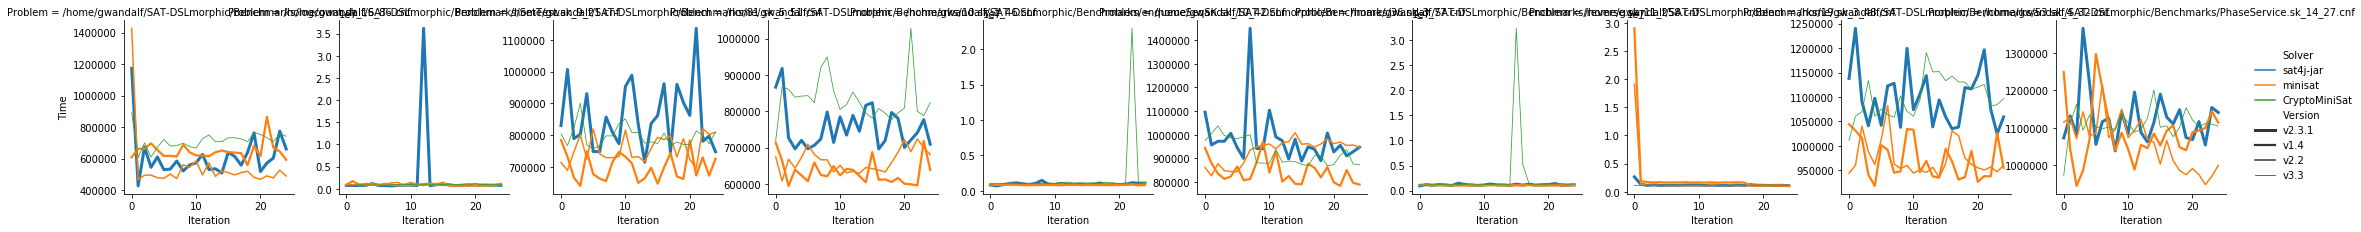

In [24]:
grid = sns.FacetGrid(df[df.Solver != "sat4j-java"], col="Problem", sharex=False, sharey=False)
grid.map(sns.lineplot, "Iteration", "Time", "Solver", "Version").add_legend()
   # sns.lineplot(x="Iteration", y="Time", hue="Solver", style="Version", err_style=None, data=df[df.Problem == p])